## CodeClause Internship
## Name : Ruchita Kamble

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset

wine_data = pd.read_csv(r"C:\Users\Lenovo\Desktop\Codeclause\winequalityN.csv")

In [3]:
#checking first 5 rows from the data

wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine_data.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
wine_data.shape

(6497, 13)

In [6]:
#checking for missing values

wine_data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [7]:
wine_data.dropna(inplace=True)

In [8]:
wine_data.shape

(6463, 13)

In [9]:
wine_data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and Visualization

In [10]:
#statistical measures of the dataset

wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
wine_data['type'].value_counts(normalize=True)

white    0.75352
red      0.24648
Name: type, dtype: float64

<Axes: xlabel='type', ylabel='count'>

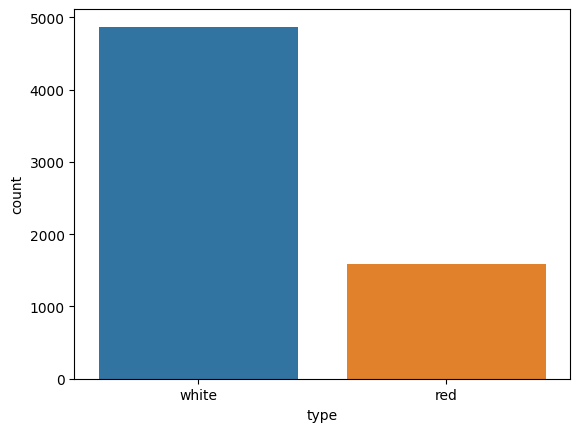

In [12]:
sns.countplot(x='type',data=wine_data)

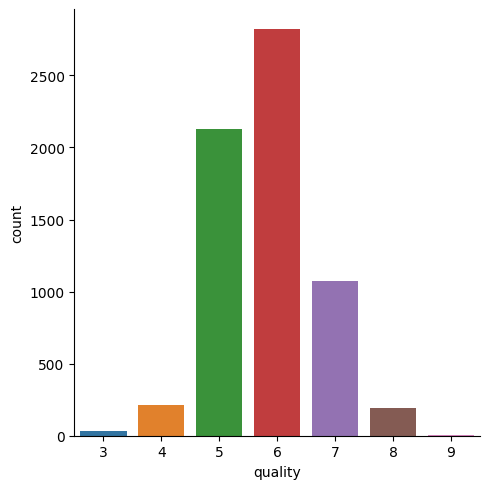

In [13]:
#number of values for each quality 

sns.catplot(x='quality', data = wine_data, kind = 'count')

<Axes: xlabel='quality', ylabel='fixed acidity'>

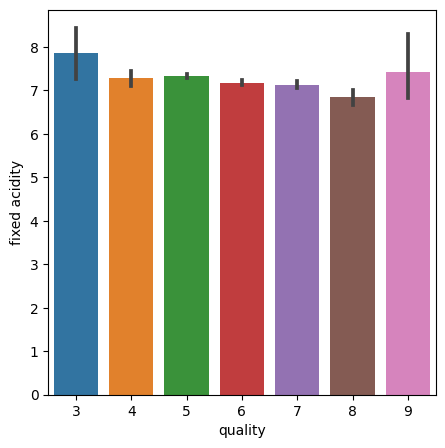

In [14]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='fixed acidity',data=wine_data)

<Axes: xlabel='quality', ylabel='volatile acidity'>

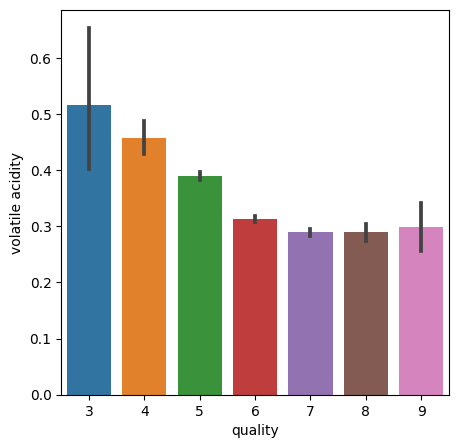

In [15]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile acidity',data=wine_data)

<Axes: xlabel='quality', ylabel='citric acid'>

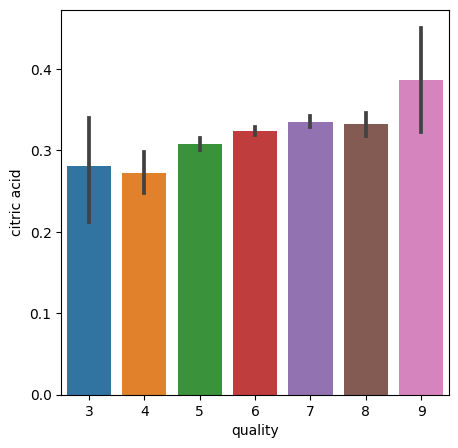

In [16]:
plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric acid',data=wine_data)

## Correlation
1. Positive Correlation
2. Negative Correlation

In [17]:
correlation = wine_data.corr()

<Axes: >

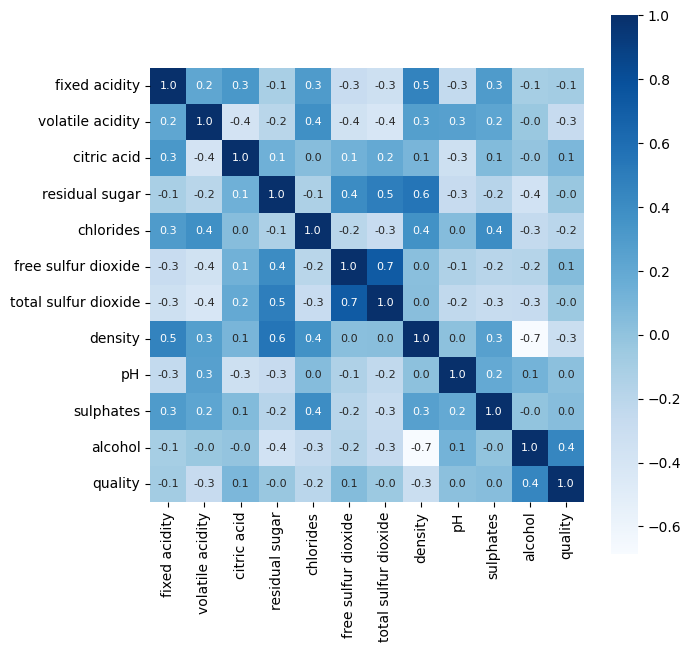

In [18]:
#constructing a heatmap to understand the correlation between the columns

plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [19]:
#changing datatype of 'type' column

wine_ml=pd.get_dummies(wine_data, drop_first=True)
wine_ml.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [20]:
wine_ml.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_white              0
dtype: int64

## Label Binarization

In [42]:
Y = wine_ml['quality'].apply(lambda y:1 if y>=7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality, Length: 6463, dtype: int64

In [22]:
X = wine_ml.drop('quality', axis=1)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

In [25]:
X = X_standard

## Train & Test Split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=245)
print(Y.shape, Y_train.shape, Y_test.shape)

(6463,) (5170,) (1293,)


## Model Training
### Logistic Regression

In [30]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [31]:
#Model Evaluation

y_pred = model.predict(X_test)

In [33]:
#Accuracy score

accuracy_score(Y_test, y_pred)

0.9706109822119103

In [34]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1256
           1       0.00      0.00      0.00        37

    accuracy                           0.97      1293
   macro avg       0.49      0.50      0.49      1293
weighted avg       0.94      0.97      0.96      1293



In [35]:
print(confusion_matrix(Y_test, y_pred))

[[1255    1]
 [  37    0]]


### Random Forest Classifier

In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [39]:
#Model Evaluation

rfc_pred = rfc.predict(X_test)

In [40]:
#Accuracy Score

accuracy_score(Y_test, rfc_pred)

0.9791183294663574

<Axes: >

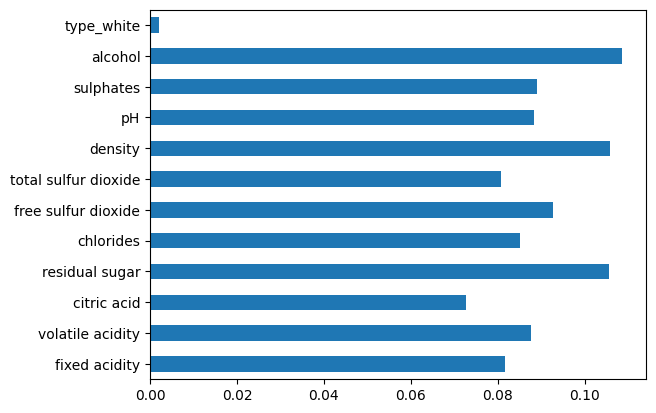

In [41]:
#important features from the data

pd.Series(rfc.feature_importances_, index=wine_ml.drop('quality',axis=1).columns).plot(kind='barh')

## Building a Predictive System

In [45]:
pred_test = wine_data.iloc[2]    #checking quality for 2nd instance from the data
pred_test
pred_test['type'] = 1
pred_test.drop('quality', inplace=True)
pred_test

type                         1
fixed acidity              8.1
volatile acidity          0.28
citric acid                0.4
residual sugar             6.9
chlorides                 0.05
free sulfur dioxide       30.0
total sulfur dioxide      97.0
density                 0.9951
pH                        3.26
sulphates                 0.44
alcohol                   10.1
Name: 2, dtype: object

In [49]:
pred_test = np.asarray(pred_test).reshape(1,-1)
scaler.fit(pred_test)
pred_test_std = scaler.transform(pred_test)

In [52]:
y_pred_test_output = model.predict(pred_test_std)  #0 says, the quality is not good. 1 says, quality is good
y_pred_test_output

array([0], dtype=int64)